**Importation of Libraries**

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report





**1**.  **Data Understanding**




In [ ]:
#Data Understanding
# Load the dataset
data = pd.read_excel('/content/Data in Brief.xlsx')
data.head()

,Name,Filing Date,Sued,Sued (including acquirer class actions),Head-quarter,Circuit,StandingDenied,Listed,Industry,NonBiz,Types of Data Breach,Hacking,Payment,CreditMonitor,pre-Clapper,post-Spokeo,Injured,LogInjured
0,"International Association of Sheet Metal, et al.",2016-12-30,0,0,PA,3,1.0,0,Nonprofit,1,disclosure,0,0,1.0,0,1,NaN,NaN
1,Graphik Dimensions Ltd.,2016-12-28,0,0,NC,4,1.0,0,eCommerce,0,hacking,1,0,0.0,0,1,NaN,NaN
2,"The Topps Company, Inc.",2016-12-27,0,0,NY,2,1.0,0,eCommerce,0,hacking,1,0,1.0,0,1,NaN,NaN
3,FriendFinder Networks Inc.,2016-12-23,0,0,CA,9,0.0,0,Online,0,hacking,1,0,0.0,0,1,412214295.0,8.615123
4,Claremont University Consortium,2016-12-22,0,0,CA,9,0.0,0,Education,1,theft/burglary,0,0,1.0,0,1,NaN,NaN


In [ ]:
# Getting some informaiton about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     761 non-null    object 
 1   Filing Date                              761 non-null    object 
 2   Sued                                     761 non-null    int64  
 3   Sued (including acquirer class actions)  761 non-null    int64  
 4   Head-quarter                             761 non-null    object 
 5   Circuit                                  756 non-null    object 
 6   StandingDenied                           756 non-null    float64
 7   Listed                                   761 non-null    int64  
 8   Industry                                 761 non-null    object 
 9   NonBiz                                   761 non-null    int64  
 10  Types of Data Breach                     761 non-n

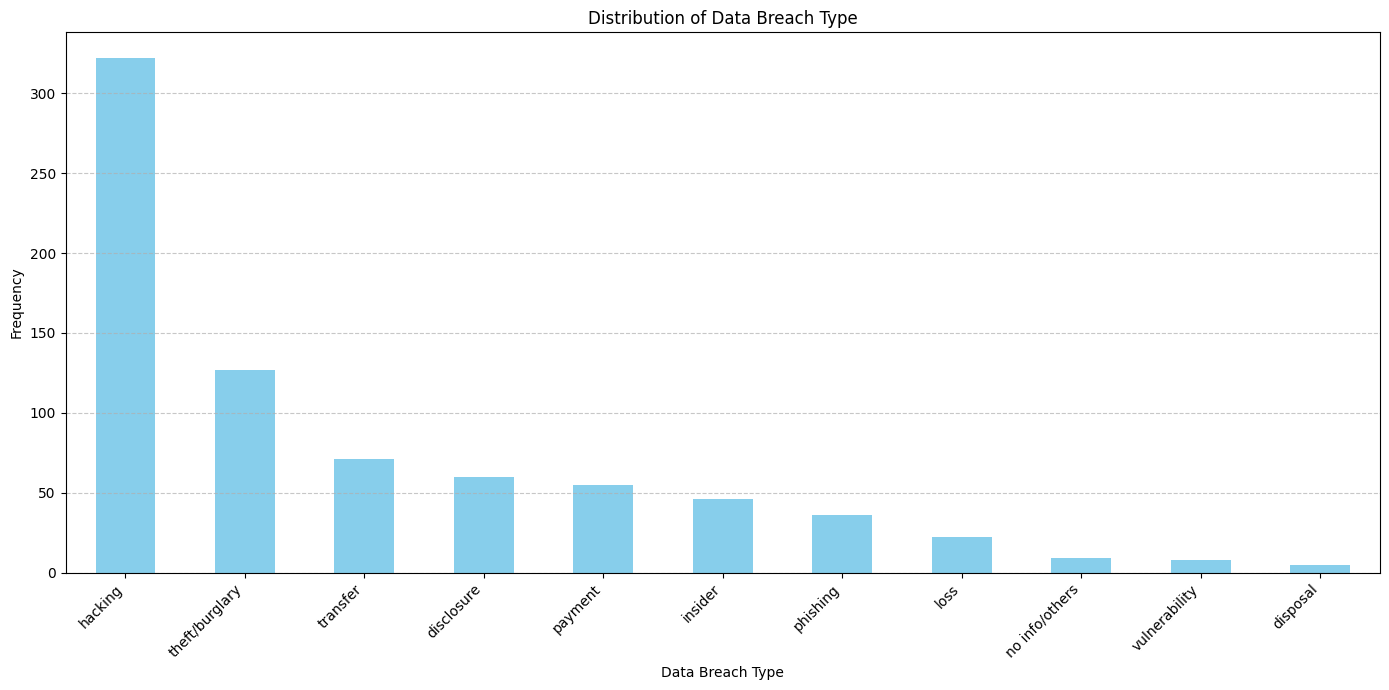

In [ ]:
#Exploration Data Analysis (EDA)
import matplotlib.pyplot as plt

# Find the Distribution of Data Breaches (DDB)
DDB = data['Types of Data Breach'].value_counts()

# Plot the Distribution of the Data Breach Type
plt.figure(figsize=(14, 7))
DDB.plot(kind='bar', color='skyblue')
plt.title('Distribution of Data Breach Type')
plt.xlabel('Data Breach Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

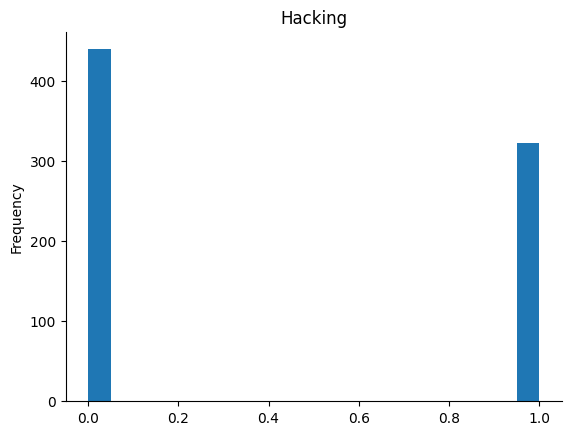

In [ ]:
from matplotlib import pyplot as plt
data['Hacking'].plot(kind='hist', bins=20, title='Hacking')
plt.gca().spines[['top', 'right',]].set_visible(False)

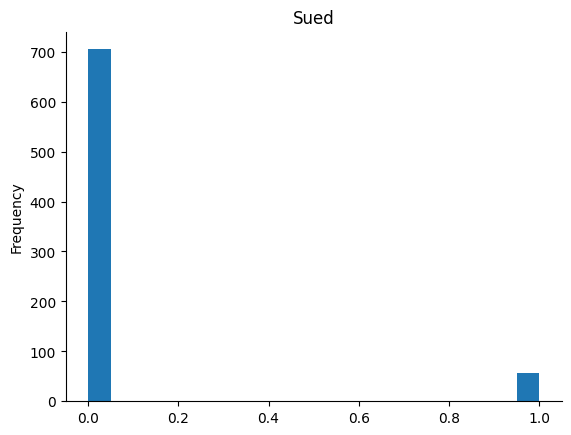

In [ ]:
# Sued

from matplotlib import pyplot as plt
data['Sued'].plot(kind='hist', bins=20, title='Sued')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Derive statistical information about our data
data.describe()

,Sued,Sued (including acquirer class actions),StandingDenied,Listed,NonBiz,Hacking,Payment,CreditMonitor,pre-Clapper,post-Spokeo,Injured,LogInjured
count,761.000000,761.000000,756.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,2.110000e+02,211.000000
mean,0.073587,0.077530,0.378307,0.141919,0.218134,0.423127,0.072273,0.655716,0.159001,0.159001,8.223596e+06,4.480931
std,0.261270,0.267606,0.485286,0.349196,0.413251,0.494380,0.259110,0.624392,0.365918,0.365918,5.167110e+07,1.412206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.698970
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.225500e+03,3.347345
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.428100e+04,4.154759
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.700000e+05,5.431066
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000e+08,8.698970




**2. Data Preprocessing**




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
MissingValues = data.isnull().sum()

# Encode the target variable 'Types of Data Breach'
LabelEncoder = LabelEncoder()
data['Breach Label'] = LabelEncoder.fit_transform(data['Types of Data Breach'])

# Display the mapping of labels to breach types
LabelMapping = dict(zip(LabelEncoder.classes_, LabelEncoder.transform(LabelEncoder.classes_)))

# Check the updated dataset
MissingValues, LabelMapping, data.head()


(Name                                         0
 Filing Date                                  0
 Sued                                         0
 Sued (including acquirer class actions)      0
 Head-quarter                                 0
 Circuit                                      5
 StandingDenied                               5
 Listed                                       0
 Industry                                     0
 NonBiz                                       0
 Types of Data Breach                         0
 Hacking                                      0
 Payment                                      0
 CreditMonitor                                0
 pre-Clapper                                  0
 post-Spokeo                                  0
 Injured                                    550
 LogInjured                                 550
 dtype: int64,
 {'disclosure': 0,
  'disposal': 1,
  'hacking': 2,
  'insider': 3,
  'loss': 4,
  'no info/others': 5,
  'payment': 6,
 

In [ ]:
#Handle Missing values
# Drop columns with high number of missing values
data = data.drop(columns=['Injured', 'LogInjured'])

# Fill missing values in other columns
data = data.fillna({
    'Circuit': data['Circuit'].mode()[0],
    'StandingDenied': data['StandingDenied'].mode()[0]
})

# Verify that there are no more missing values
MissingValuesAfter = data.isnull().sum()

# Display the updated missing values status
MissingValuesAfter


,0
Name,0
Filing Date,0
Sued,0
Sued (including acquirer class actions),0
Head-quarter,0
Circuit,0
StandingDenied,0
Listed,0
Industry,0
NonBiz,0


In [ ]:
#Prepare the text data for BERT Model.
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Initialize BERT tokenizer
BERT_Tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_text(text):
    return BERT_Tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )

# Apply tokenization to the 'Types of Data Breach' column
TokenizedData = data['Types of Data Breach'].apply(tokenize_text)

# Extract input ids and attention masks
input_ids = torch.cat([item['input_ids'] for item in TokenizedData], dim=0)
AttentionMasks = torch.cat([item['attention_mask'] for item in TokenizedData], dim=0)
labels = torch.tensor(data['Breach Label'].values)

# Split the data into training and validation sets
TrainInputs, ValInputs, TrainLabels, ValLabels = train_test_split(
    input_ids, labels,
    random_state=42,
    test_size=0.2
)
TrainMasks, ValMasks, _, _ = train_test_split(
    AttentionMasks, labels,
    random_state=42,
    test_size=0.2
)

# Display the shapes of the resulting tensors
TrainInputs.shape, ValInputs.shape, TrainMasks.shape, ValMasks.shape, TrainLabels.shape, ValLabels.shape


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


(torch.Size([608, 128]),
 torch.Size([153, 128]),
 torch.Size([608, 128]),
 torch.Size([153, 128]),
 torch.Size([608]),
 torch.Size([153]))



**3. Train the BERT model:**




In [ ]:
import torch
from torch.optim import AdamW
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Create DataLoader for training and validation sets
BatchSize = 16

TrainData = TensorDataset(TrainInputs, TrainMasks, TrainLabels)
TrainSampler = RandomSampler(TrainData)
TrainDataloader = DataLoader(TrainData, sampler=TrainSampler, batch_size=BatchSize)

ValData = TensorDataset(ValInputs, ValMasks, ValLabels)
ValSampler = SequentialSampler(ValData)
ValDataloader = DataLoader(ValData, sampler=ValSampler, batch_size=BatchSize)

# Initialize BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(LabelMapping),
    output_attentions=False,
    output_hidden_states=False
)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training loop
epochs = 3

for epoch in range(epochs):
    model.train()
    for step, batch in enumerate(TrainDataloader):
        b_input_ids, b_input_mask, b_labels = batch
        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    for batch in ValDataloader:
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            val_loss = outputs.loss
            logits = outputs.logits


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**4. Model Evaluation**

Accuracy: 0.9869
Precision: 0.9762
Recall: 0.9869
F1-score: 0.9810


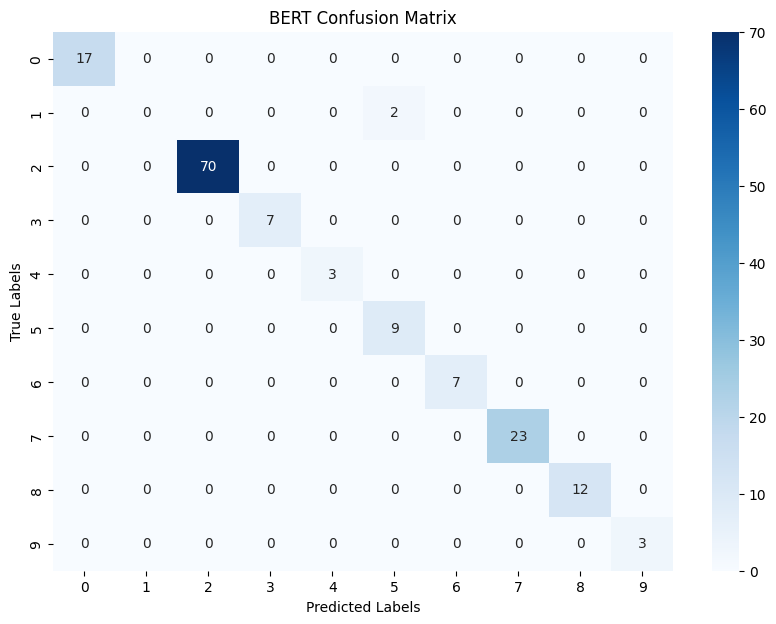

In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Put model in evaluation mode
model.eval()

# Lists to store true labels and prediction probabilities
PredictionProbs, TrueLabels = [], []

# Loop through validation dataloader
for batch in ValDataloader:
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        # Apply softmax to get probabilities
        probs = torch.softmax(logits, dim=1)

        # Store predicted labels and true labels
        PredictionProbs.extend(probs.tolist())
        TrueLabels.extend(b_labels.tolist())

# Convert lists to numpy arrays for metric calculation
PredictionProbs = np.array(PredictionProbs)
TrueLabels = np.array(TrueLabels)

# Get predicted labels
PredictedLabels = np.argmax(PredictionProbs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(TrueLabels, PredictedLabels)
precision = precision_score(TrueLabels, PredictedLabels, average='weighted', zero_division=0)
recall = recall_score(TrueLabels, PredictedLabels, average='weighted', zero_division=0)
f1 = f1_score(TrueLabels, PredictedLabels, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(TrueLabels, PredictedLabels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('BERT Confusion Matrix')
plt.show()


**Applying SMOTE Technique to balance the Dataset**

In [ ]:
#Prepare the text data for BERT Model.
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Initialize BERT tokenizer
BERT_Tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_text(text):
    return BERT_Tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )

# Apply tokenization to the 'Types of Data Breach' column
TokenizedData = data['Types of Data Breach'].apply(tokenize_text)

# Extract input IDs and attention masks
input_ids = torch.cat([item['input_ids'] for item in TokenizedData], dim=0)
AttentionMasks = torch.cat([item['attention_mask'] for item in TokenizedData], dim=0)
labels = torch.tensor(data['Breach Label'].values)

# Split the data into training and validation sets
TrainInputs, ValInputs, TrainLabels, ValLabels = train_test_split(
    input_ids, labels,
    random_state=42,
    test_size=0.2
)
TrainMasks, ValMasks, _, _ = train_test_split(
    AttentionMasks, labels,
    random_state=42,
    test_size=0.2
)

# Convert tensors to numpy arrays for SMOTE
np_train_inputs = TrainInputs.numpy()
np_train_labels = TrainLabels.numpy()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=2)
resampled_train_inputs, resampled_train_labels = smote.fit_resample(np_train_inputs, np_train_labels)

# Convert resampled data back to tensors
resampled_train_inputs = torch.tensor(resampled_train_inputs)
resampled_train_labels = torch.tensor(resampled_train_labels)

# Display the shapes of the resulting tensors
resampled_train_inputs.shape, ValInputs.shape, TrainMasks.shape, ValMasks.shape, resampled_train_labels.shape, ValLabels.shape


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


(torch.Size([2772, 128]),
 torch.Size([153, 128]),
 torch.Size([608, 128]),
 torch.Size([153, 128]),
 torch.Size([2772]),
 torch.Size([153]))

**Model Retraining After Handling Class Imbalance using SMOTE Technique**

In [ ]:
#Model Re-training

import torch
from torch.optim import AdamW
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Create DataLoader for training and validation sets
BatchSize = 16

TrainData = TensorDataset(TrainInputs, TrainMasks, TrainLabels)
TrainSampler = RandomSampler(TrainData)
TrainDataloader = DataLoader(TrainData, sampler=TrainSampler, batch_size=BatchSize)

ValData = TensorDataset(ValInputs, ValMasks, ValLabels)
ValSampler = SequentialSampler(ValData)
ValDataloader = DataLoader(ValData, sampler=ValSampler, batch_size=BatchSize)

# Initialize BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(LabelMapping),
    output_attentions=False,
    output_hidden_states=False
)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training loop (simplified)
epochs = 3

for epoch in range(epochs):
    model.train()
    for step, batch in enumerate(TrainDataloader):
        b_input_ids, b_input_mask, b_labels = batch
        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop (simplified)
    model.eval()
    for batch in ValDataloader:
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            val_loss = outputs.loss
            logits = outputs.logits


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9673
Precision: 0.9463
Recall: 0.9673
F1-score: 0.9548


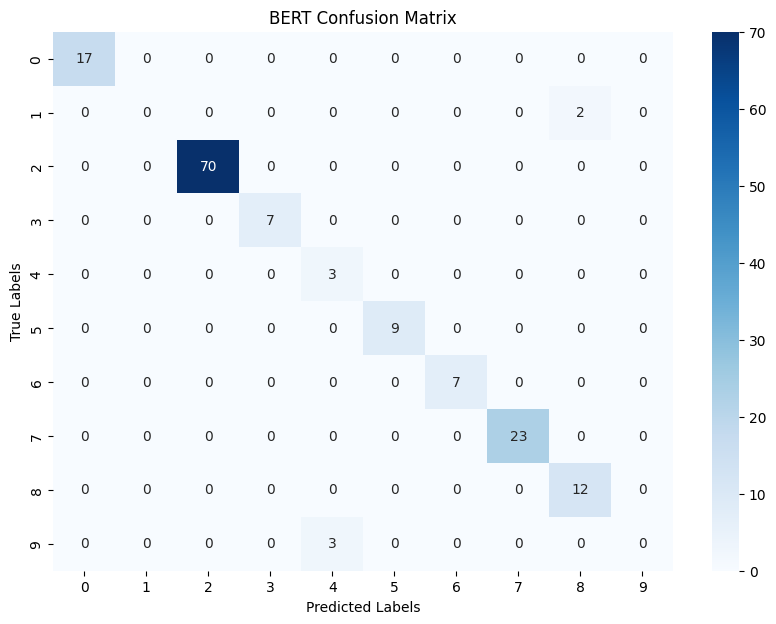

In [ ]:
#Model Re-Evaluation

import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Put model in evaluation mode
model.eval()

# Lists to store true labels and prediction probabilities
PredictionProbs, TrueLabels = [], []

# Loop through validation dataloader
for batch in ValDataloader:
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        # Apply softmax to get probabilities
        probs = torch.softmax(logits, dim=1)

        # Store predicted labels and true labels (argmax to get predicted class from probabilities)
        PredictionProbs.extend(probs.tolist())
        TrueLabels.extend(b_labels.tolist())

# Convert lists to numpy arrays for metric calculation
PredictionProbs = np.array(PredictionProbs)
TrueLabels = np.array(TrueLabels)

# Get predicted labels
PredictedLabels = np.argmax(PredictionProbs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(TrueLabels, PredictedLabels)
precision = precision_score(TrueLabels, PredictedLabels, average='weighted', zero_division=0)
recall = recall_score(TrueLabels, PredictedLabels, average='weighted', zero_division=0)
f1 = f1_score(TrueLabels, PredictedLabels, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(TrueLabels, PredictedLabels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('BERT Confusion Matrix')
plt.show()